In [4]:
# # the imports in this cell are required when running on local device
# import os, sys
# sys.path.append(os.path.join('..', '..'))
# from utils.applyML_util import train_regression, eval_regression
# from utils.featureSelection_util import (pearson_correlation_fs, 
#                                          seleckKBest_fs, selectSequential_fs)

In [ ]:
!pip install catboost

In [6]:
# the imports in this cell are required when running from Cloud (Colab/Kaggle)
# before running on cloud you nee to upload the .py files 
# from 'Notebooks/utils' directory
from applyML_util import train_regression, eval_regression, showEvalutationGraph_regression
from featureSelection_util import (pearson_correlation_fs, 
                                   seleckKBest_fs, selectSequential_fs)

**CatBoost Documentation link:** https://catboost.ai/en/docs/concepts/python-reference_catboostregressor

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor

In [12]:
# global random seed
RAND_SEED = 42

# initial model with only random seed and not any hyper-parametes
initial_model = CatBoostRegressor(random_state=RAND_SEED, verbose = 0)

# hyper-parameters

max_depth = [3,4,5]

n_estimators = list(range(50,300,10))

learning_rate = np.arange(.1 , 1 , .1).tolist()

# dictonary of all hyperparameters
param_grid = {'n_estimators': n_estimators , 
              'max_depth':max_depth , 'learning_rate': learning_rate}

# variables needed for showEvalGraph_regression() function
MODEL_CLASS = CatBoostRegressor
x_axis_param_name = 'n_estimators'
x_axis_vals = n_estimators

## 1. Experimentation on the Weather Daily dataset

In [9]:
# Load the train dataset
weather_daily_train_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/train/brri-weather_train_regression.csv')

# Load the test set
weather_daily_test_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/test/brri-weather_test_regression.csv')

In [10]:
# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(initial_model, param_grid, weather_daily_train_df, cls='Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

Selected hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 60}
Train set performance: r2-score=0.2676, mae=6.164, rmse=12.7779


Streaming output truncated to the last 5000 lines.
140:	learn: 9.6300989	total: 251ms	remaining: 247ms
141:	learn: 9.6252772	total: 252ms	remaining: 245ms
142:	learn: 9.6119234	total: 254ms	remaining: 243ms
143:	learn: 9.6097281	total: 256ms	remaining: 241ms
144:	learn: 9.5948020	total: 257ms	remaining: 239ms
145:	learn: 9.5767604	total: 259ms	remaining: 238ms
146:	learn: 9.5648867	total: 261ms	remaining: 236ms
147:	learn: 9.5532657	total: 262ms	remaining: 234ms
148:	learn: 9.5492048	total: 264ms	remaining: 232ms
149:	learn: 9.5313075	total: 265ms	remaining: 230ms
150:	learn: 9.5189796	total: 267ms	remaining: 228ms
151:	learn: 9.5154690	total: 269ms	remaining: 226ms
152:	learn: 9.5122414	total: 270ms	remaining: 224ms
153:	learn: 9.5105382	total: 272ms	remaining: 222ms
154:	learn: 9.5001736	total: 273ms	remaining: 221ms
155:	learn: 9.4811425	total: 275ms	remaining: 219ms
156:	learn: 9.4665444	total: 277ms	remaining: 217ms
157:	learn: 9.4630994	total: 278ms	remaining: 215ms
158:	learn: 9

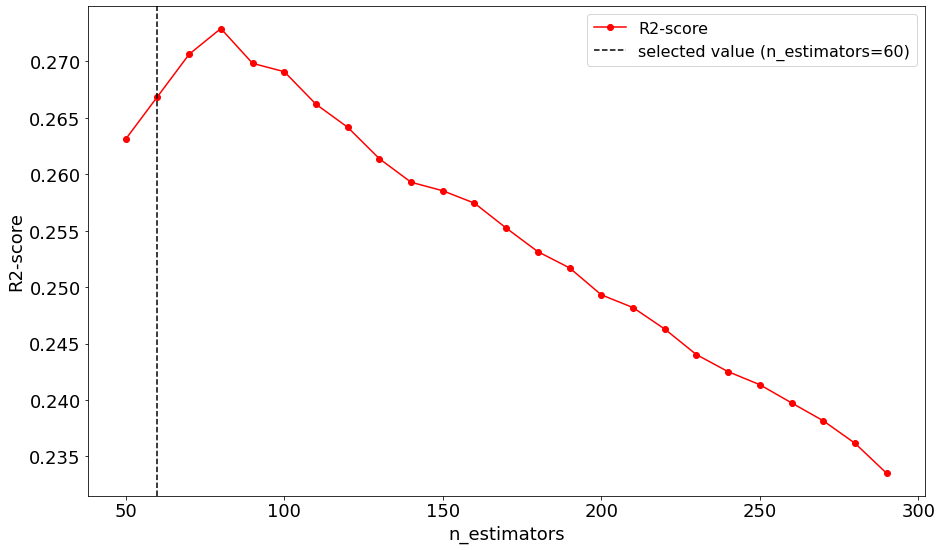

In [13]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
#selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_regression(MODEL_CLASS, weather_daily_train_df, cls='Rainfall (mm)', 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_vals, 
                                selected_model_params=selected_model_params)

In [14]:
# test model
test_r2, test_mae, test_rmse = eval_regression(model, weather_daily_test_df, cls='Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Test set performance: r2-score=0.1771, mae=6.6006, rmse=15.685


### 1.1 Apply Pearson Feature Selection to Daily Weather Dataset

In [15]:
# select features from the train dataset
weather_daily_fs1_train_df, cols_to_drop = pearson_correlation_fs(weather_daily_train_df, 'Rainfall (mm)')

# keep only selected features on the test dataset
weather_daily_fs1_test_df = weather_daily_test_df.drop(columns=cols_to_drop)

dropping Sunshine (hour/day) from (Cloudy (hour/day), Sunshine (hour/day))


In [16]:
# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(initial_model, param_grid, weather_daily_fs1_train_df, cls='Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

Selected hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 80}
Train set performance: r2-score=0.2636, mae=6.1913, rmse=12.8011


Streaming output truncated to the last 5000 lines.
140:	learn: 10.5337492	total: 207ms	remaining: 204ms
141:	learn: 10.5251277	total: 208ms	remaining: 202ms
142:	learn: 10.5098995	total: 209ms	remaining: 200ms
143:	learn: 10.4856955	total: 211ms	remaining: 199ms
144:	learn: 10.4736961	total: 212ms	remaining: 197ms
145:	learn: 10.4514915	total: 214ms	remaining: 196ms
146:	learn: 10.4450090	total: 215ms	remaining: 194ms
147:	learn: 10.4263663	total: 216ms	remaining: 193ms
148:	learn: 10.4237357	total: 217ms	remaining: 191ms
149:	learn: 10.4127764	total: 219ms	remaining: 189ms
150:	learn: 10.4027734	total: 220ms	remaining: 188ms
151:	learn: 10.3863311	total: 221ms	remaining: 186ms
152:	learn: 10.3786483	total: 223ms	remaining: 185ms
153:	learn: 10.3602160	total: 224ms	remaining: 183ms
154:	learn: 10.3522453	total: 225ms	remaining: 182ms
155:	learn: 10.3480883	total: 227ms	remaining: 180ms
156:	learn: 10.3386185	total: 228ms	remaining: 179ms
157:	learn: 10.3342322	total: 229ms	remaining: 1

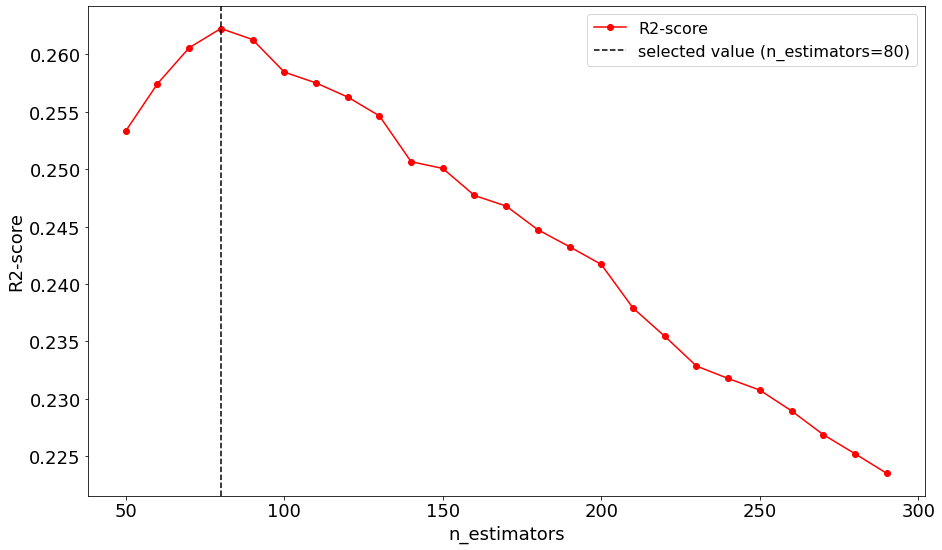

In [17]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
#selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_regression(MODEL_CLASS, weather_daily_fs1_train_df, cls='Rainfall (mm)', 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_vals, 
                                selected_model_params=selected_model_params)

In [18]:
# test model
test_r2, test_mae, test_rmse = eval_regression(model, weather_daily_fs1_test_df, cls='Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Test set performance: r2-score=0.1859, mae=6.5358, rmse=15.6015


### 1.2 Apply SelectKBest Feature Selection to Daily Weather Dataset

In [19]:
# select features from the train dataset
weather_daily_fs2_train_df, cols_to_drop = seleckKBest_fs(weather_daily_train_df, 'Rainfall (mm)', is_regression=True)

print('features dropped:', cols_to_drop)

# keep only selected features on the test dataset
weather_daily_fs2_test_df = weather_daily_test_df.drop(columns=cols_to_drop)

features dropped: ['Max Temp. (degree Celcius)', 'Solar Radiation (cal/cm^2/day)']


In [20]:
# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(initial_model, param_grid, weather_daily_fs2_train_df, cls='Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

Selected hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Train set performance: r2-score=0.2661, mae=6.156, rmse=12.7928


Streaming output truncated to the last 5000 lines.
140:	learn: 10.0927515	total: 233ms	remaining: 229ms
141:	learn: 10.0837782	total: 234ms	remaining: 228ms
142:	learn: 10.0785224	total: 236ms	remaining: 226ms
143:	learn: 10.0700605	total: 237ms	remaining: 224ms
144:	learn: 10.0659130	total: 238ms	remaining: 222ms
145:	learn: 10.0518547	total: 240ms	remaining: 220ms
146:	learn: 10.0423625	total: 242ms	remaining: 219ms
147:	learn: 10.0384397	total: 243ms	remaining: 217ms
148:	learn: 10.0306024	total: 245ms	remaining: 215ms
149:	learn: 10.0157449	total: 246ms	remaining: 213ms
150:	learn: 10.0111018	total: 248ms	remaining: 212ms
151:	learn: 9.9944543	total: 249ms	remaining: 210ms
152:	learn: 9.9767171	total: 251ms	remaining: 208ms
153:	learn: 9.9687859	total: 252ms	remaining: 206ms
154:	learn: 9.9494343	total: 254ms	remaining: 204ms
155:	learn: 9.9312563	total: 255ms	remaining: 203ms
156:	learn: 9.9139259	total: 256ms	remaining: 201ms
157:	learn: 9.9107601	total: 258ms	remaining: 199ms
15

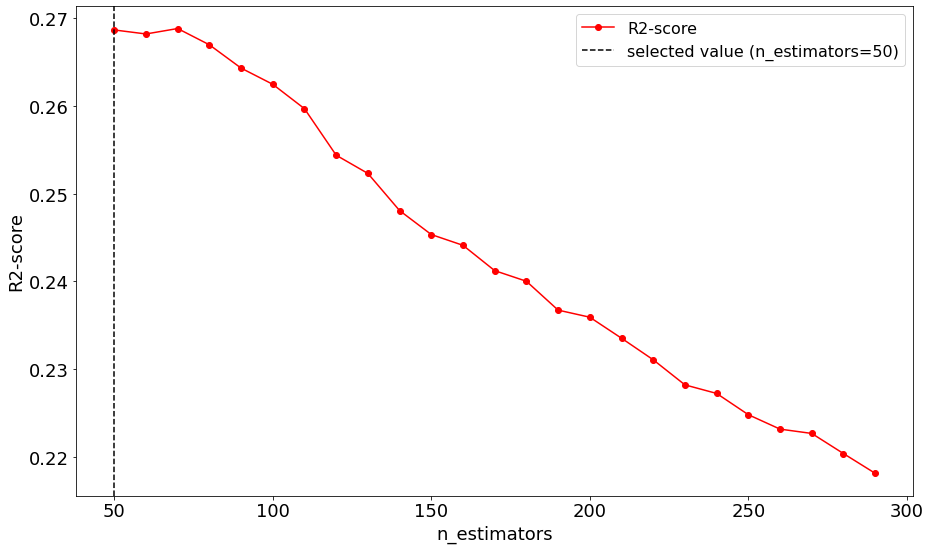

In [21]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
#selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_regression(MODEL_CLASS, weather_daily_fs2_train_df, cls='Rainfall (mm)', 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_vals, 
                                selected_model_params=selected_model_params)

In [22]:
# test model
test_r2, test_mae, test_rmse = eval_regression(model, weather_daily_fs2_test_df, cls='Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Test set performance: r2-score=0.1736, mae=6.5987, rmse=15.7189


### 1.3 Apply SelectSequential Feature Selection to Daily Weather Dataset

In [23]:
# select features from the train dataset
weather_daily_fs3_train_df, cols_to_drop = selectSequential_fs(weather_daily_train_df, 'Rainfall (mm)', is_regression=True)

print('features dropped:', cols_to_drop)

# keep only selected features on the test dataset
weather_daily_fs3_test_df = weather_daily_test_df.drop(columns=cols_to_drop)

features dropped: ['Actual Evaporation (mm)', 'Relative Humidity (morning, %)']


In [24]:
# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(initial_model, param_grid, weather_daily_fs3_train_df, cls='Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

Selected hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 60}
Train set performance: r2-score=0.2319, mae=6.2475, rmse=13.0862


Streaming output truncated to the last 5000 lines.
140:	learn: 10.4558850	total: 249ms	remaining: 246ms
141:	learn: 10.4439135	total: 251ms	remaining: 244ms
142:	learn: 10.4337068	total: 252ms	remaining: 241ms
143:	learn: 10.4231800	total: 254ms	remaining: 239ms
144:	learn: 10.4040486	total: 255ms	remaining: 238ms
145:	learn: 10.3840883	total: 257ms	remaining: 236ms
146:	learn: 10.3728165	total: 258ms	remaining: 233ms
147:	learn: 10.3475039	total: 260ms	remaining: 231ms
148:	learn: 10.3362206	total: 261ms	remaining: 230ms
149:	learn: 10.3226454	total: 263ms	remaining: 228ms
150:	learn: 10.3151160	total: 264ms	remaining: 226ms
151:	learn: 10.2967177	total: 266ms	remaining: 224ms
152:	learn: 10.2818360	total: 267ms	remaining: 222ms
153:	learn: 10.2662067	total: 269ms	remaining: 220ms
154:	learn: 10.2630385	total: 271ms	remaining: 218ms
155:	learn: 10.2567134	total: 272ms	remaining: 216ms
156:	learn: 10.2477873	total: 274ms	remaining: 214ms
157:	learn: 10.2313972	total: 275ms	remaining: 2

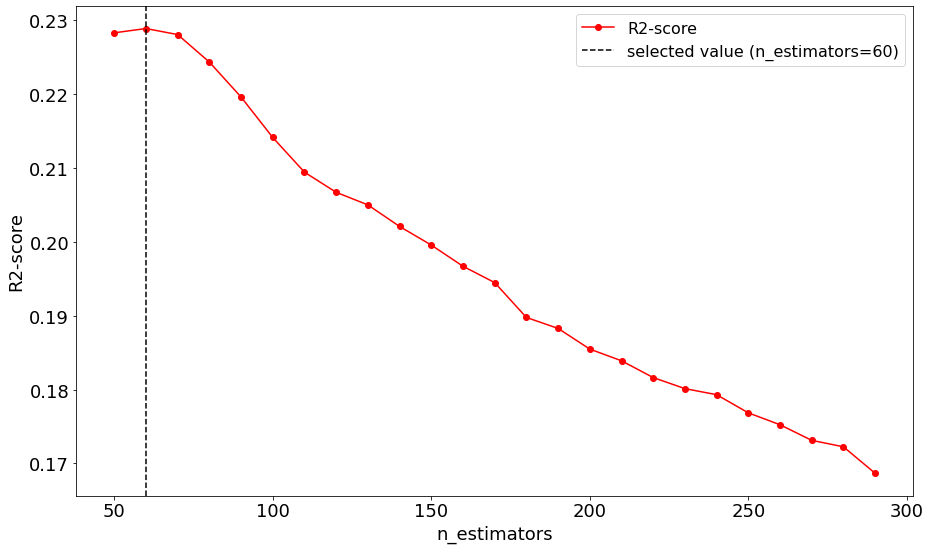

In [25]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
#selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_regression(MODEL_CLASS, weather_daily_fs3_train_df, cls='Rainfall (mm)', 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_vals, 
                                selected_model_params=selected_model_params)

In [26]:
# test model
test_r2, test_mae, test_rmse = eval_regression(model, weather_daily_fs3_test_df, cls='Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Test set performance: r2-score=0.1503, mae=6.7874, rmse=15.9391
